In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv('/content/mcdonalds.csv')

In [4]:
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [6]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
data1 = data.replace({'Yes': 1, "No": 0})
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [13]:
#ENCODING
data1['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [14]:
data1['VisitFrequency'] = data1['VisitFrequency'].astype('category')
data1['VisitFrequency'] = data1['VisitFrequency'].cat.codes

In [16]:
data1['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64


In [17]:
data1['Gender'] = data1['Gender'].astype('category')
data1['Gender'] = data1['Gender'].cat.codes

In [18]:
data1['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [19]:
data1['Like'] = data1['Like'].astype('category')
data1['Like'] = data1['Like'].cat.codes

In [20]:
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1


In [22]:
data1.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int8 
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int8 
 14  Gender          1453 non-null   int8 
dtypes: int64(12), int8(3)
memory usage: 140.6 KB


In [24]:
data1.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

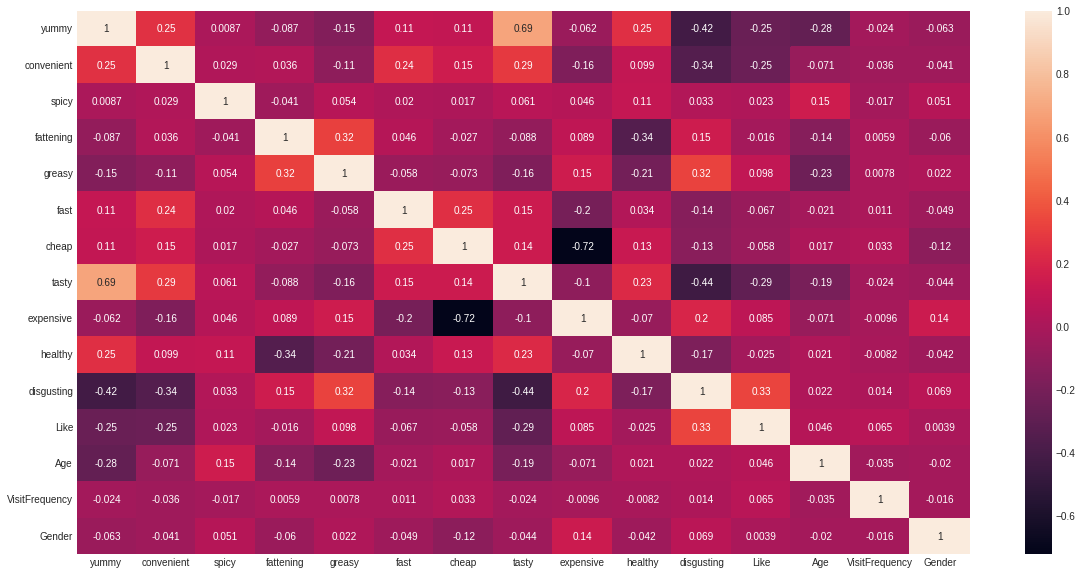

In [46]:
plt. figure(figsize=(20,10))

cor = data1.corr()
sns.heatmap(cor, annot=True)
plt.show()

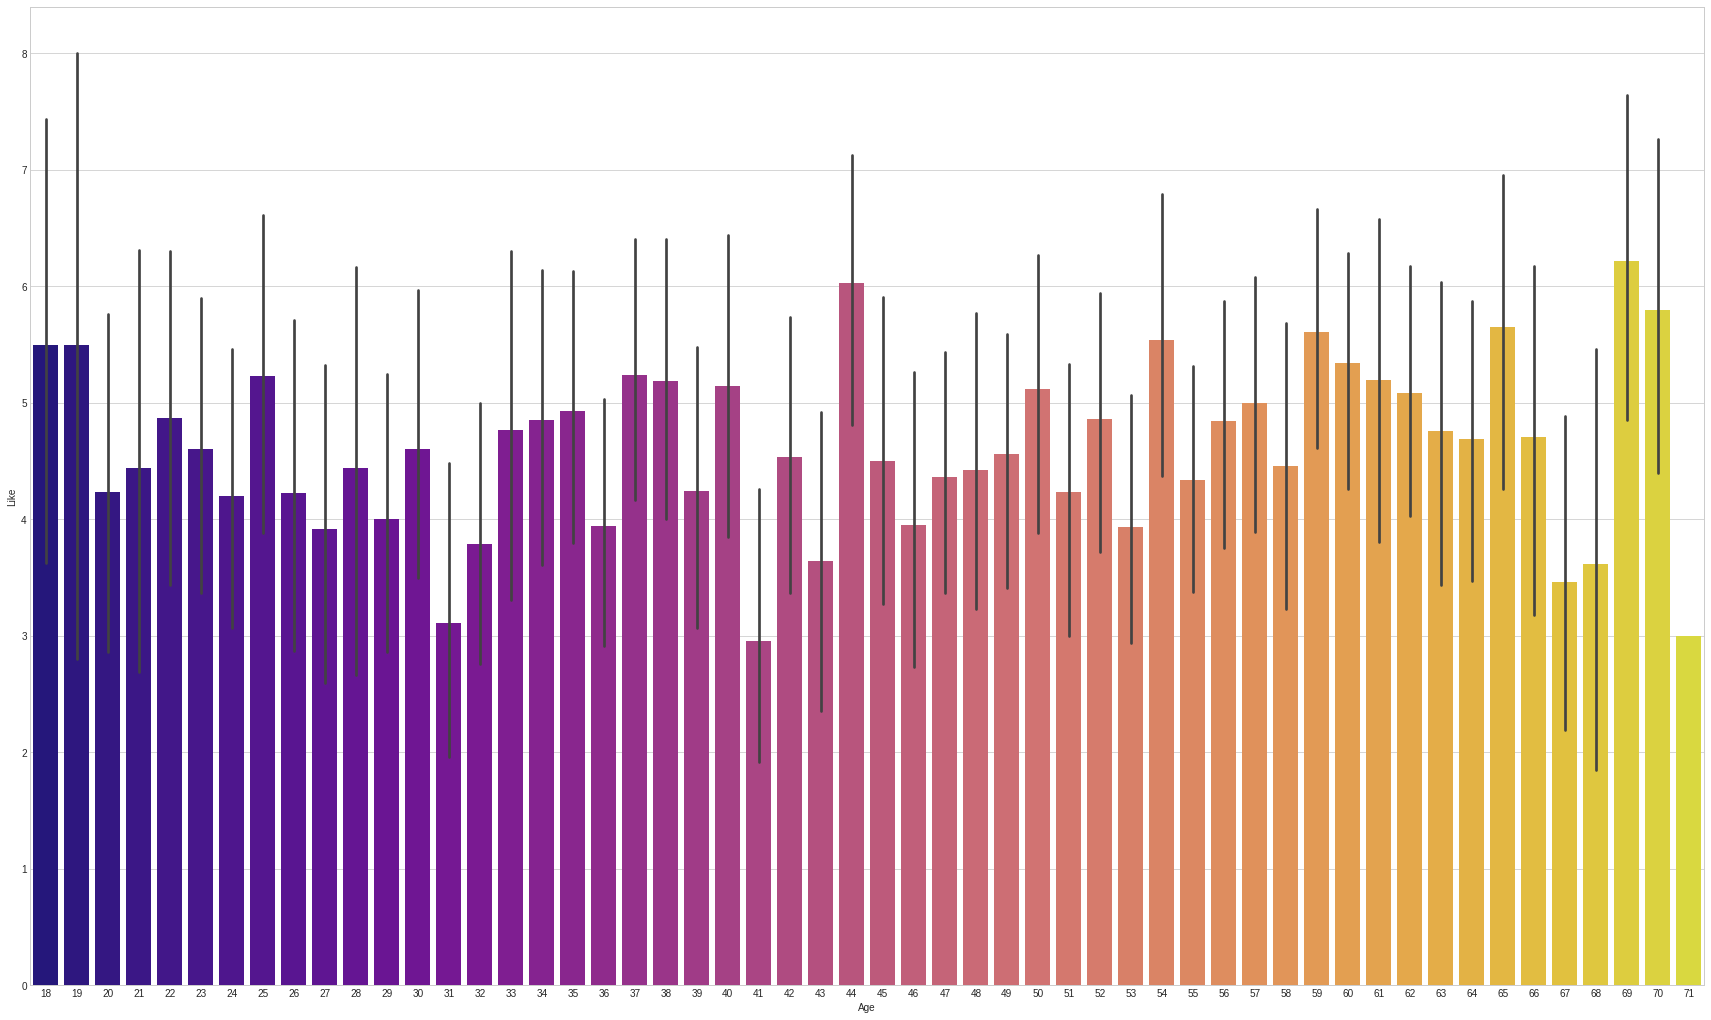

In [31]:
plt.figure(figsize=(30,18))
sns.barplot(x ='Age', y ='Like', data = data1, 
            palette ='plasma')

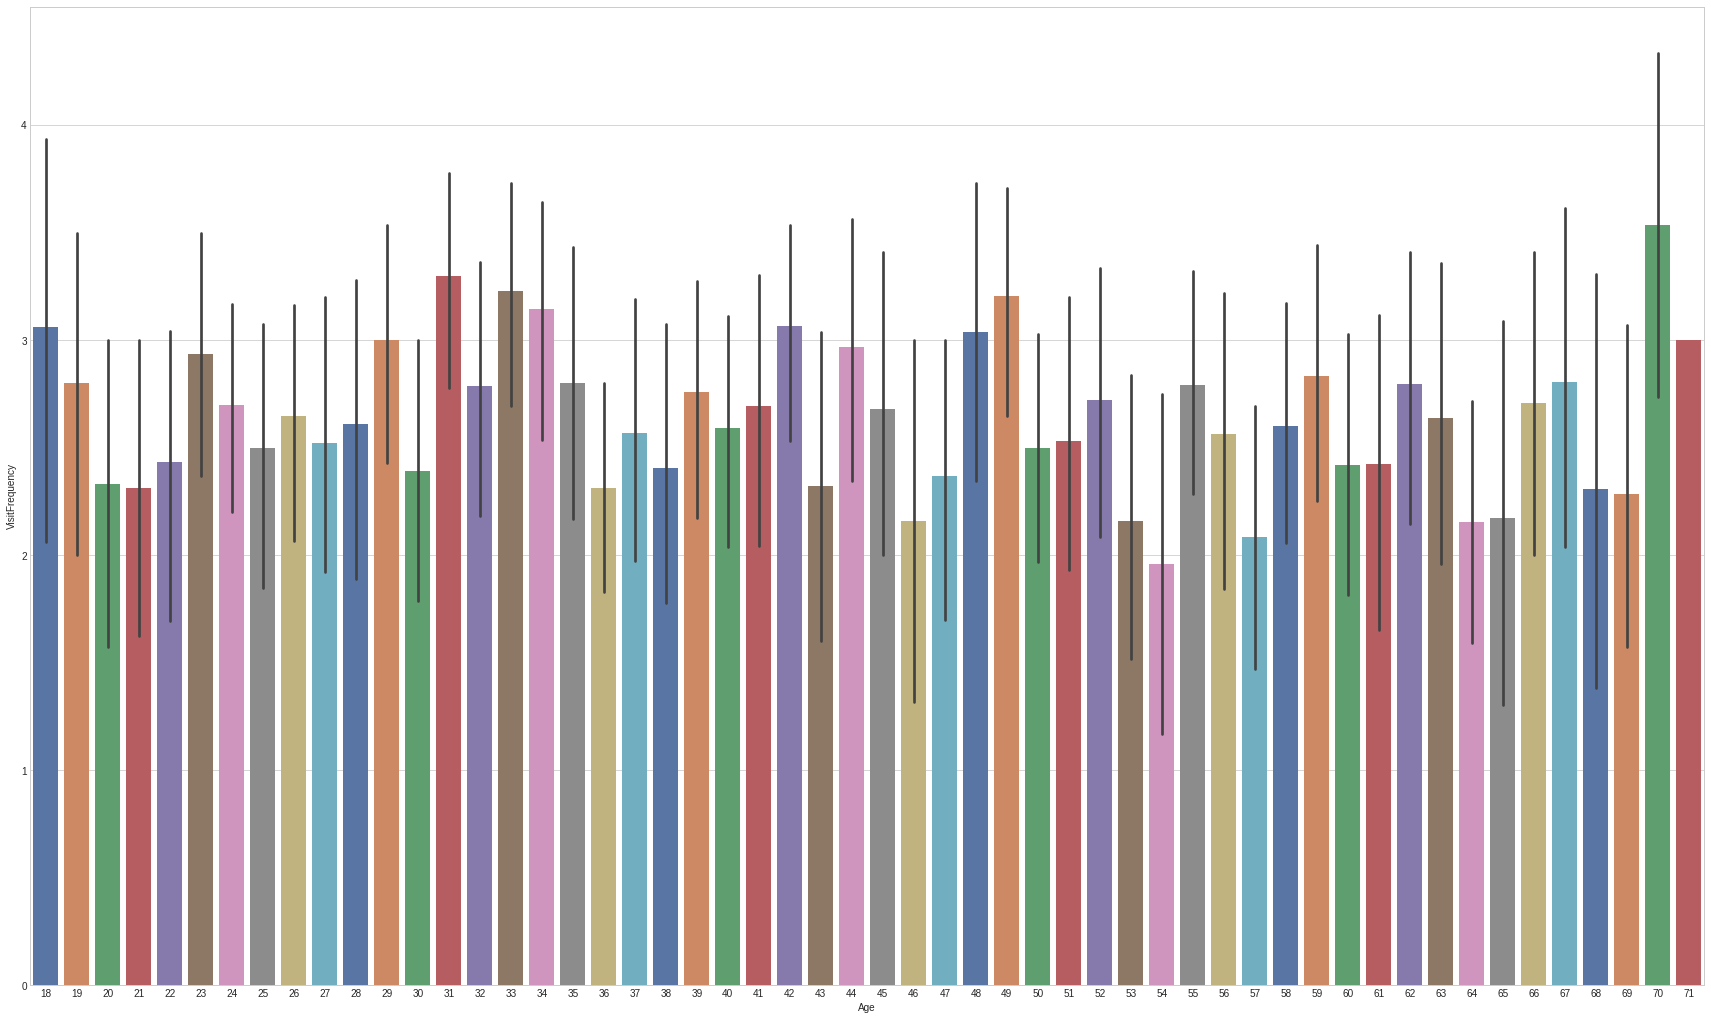

In [33]:
plt.figure(figsize=(30,18))
sns.barplot(x ='Age', y ='VisitFrequency', data = data1, 
            palette ='deep')

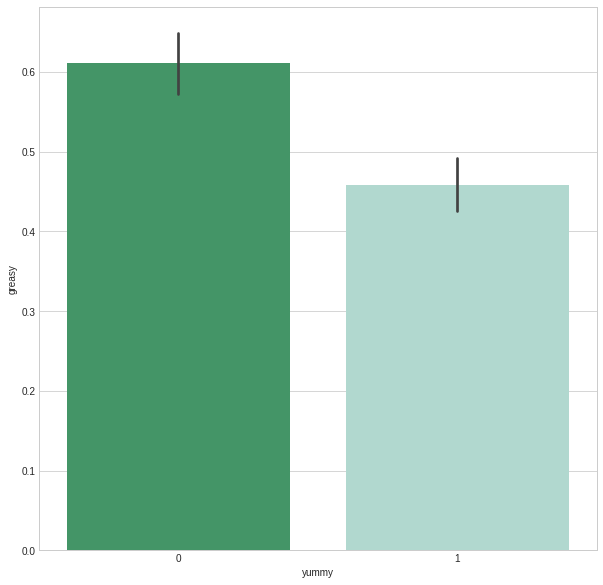

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(x ='yummy', y ='greasy', data = data1, 
            palette ='BuGn_r')

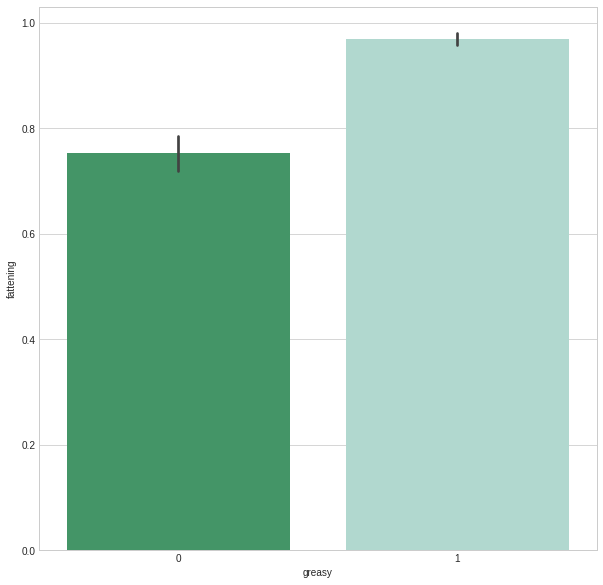

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x ='greasy', y ='fattening', data = data1, 
            palette ='BuGn_r')

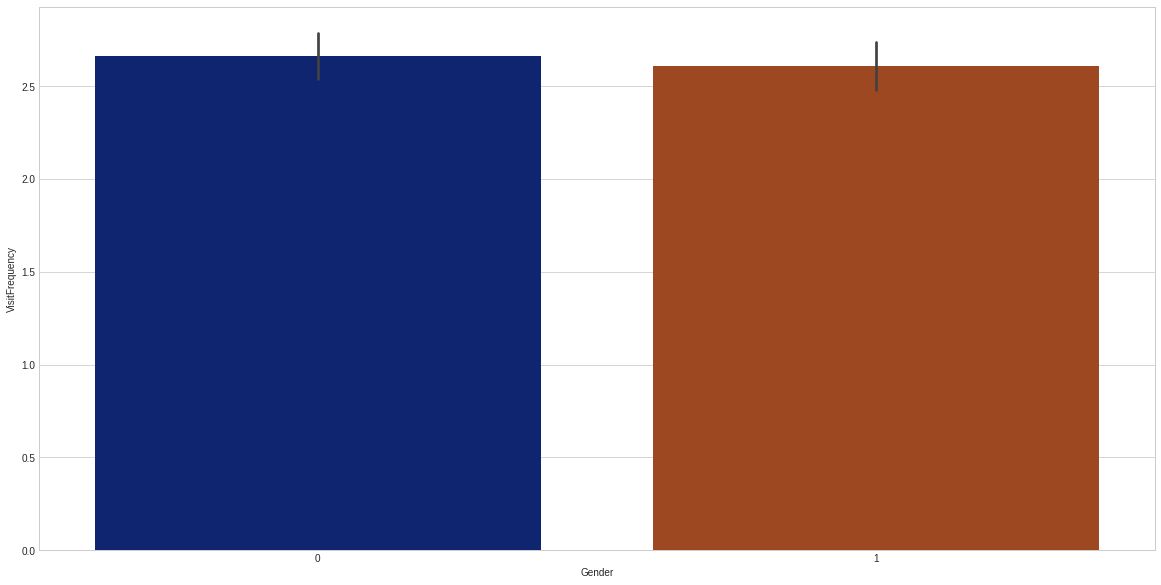

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x ='Gender', y ='VisitFrequency', data = data1, 
            palette ='dark')

#### Clustering

In [50]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

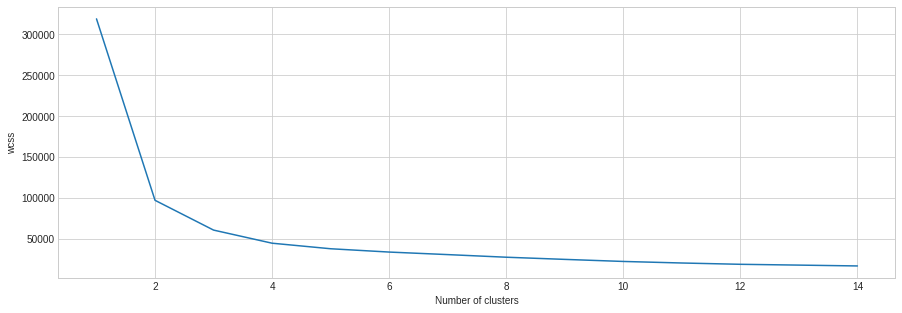

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4)
data_predict = kmeans.fit_predict(data1)

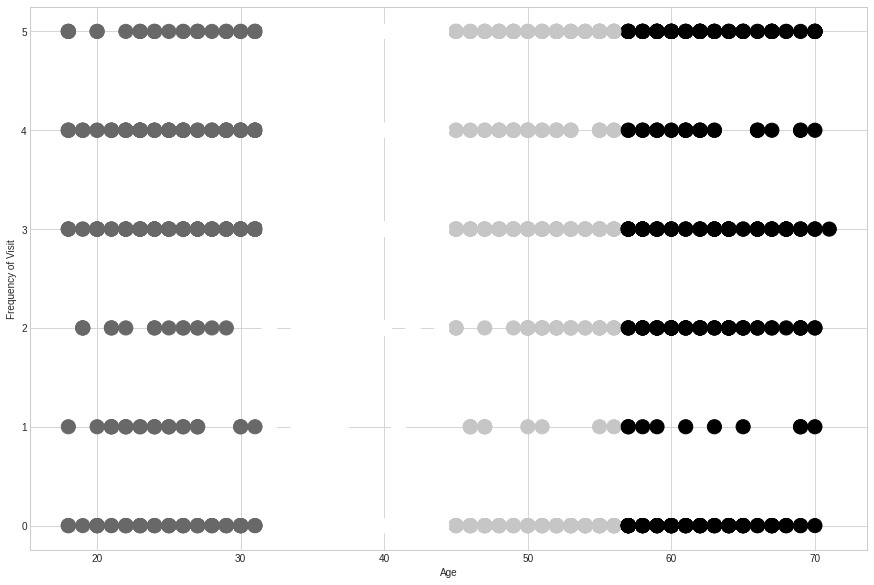

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(x ='Age', y ='VisitFrequency', data = data1 , c = data_predict , s = 200)
plt.xlabel("Age")
plt.ylabel("Frequency of Visit")
plt.show()

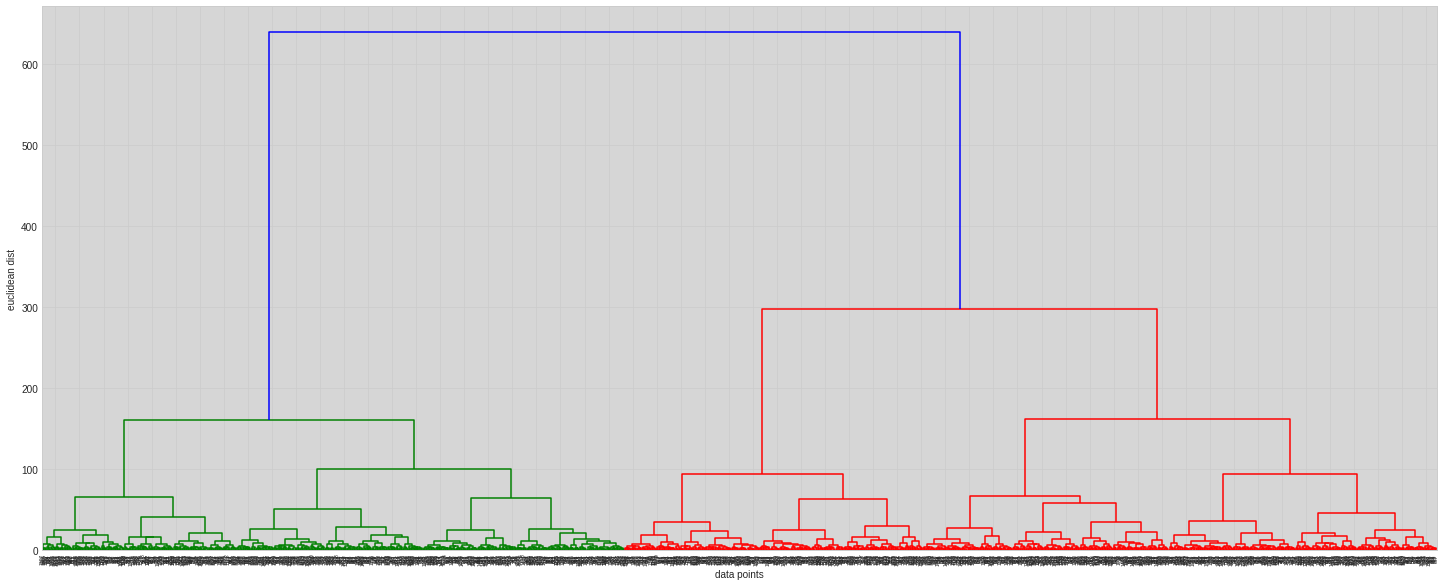

In [59]:
#Heirarchieal Clustering
link = linkage(data1,method="ward")
plt.figure(figsize=(25,10))
dendrogram(link,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean dist")
plt.show()

In [60]:
hc = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
data_predict1 = hc.fit_predict(data1)

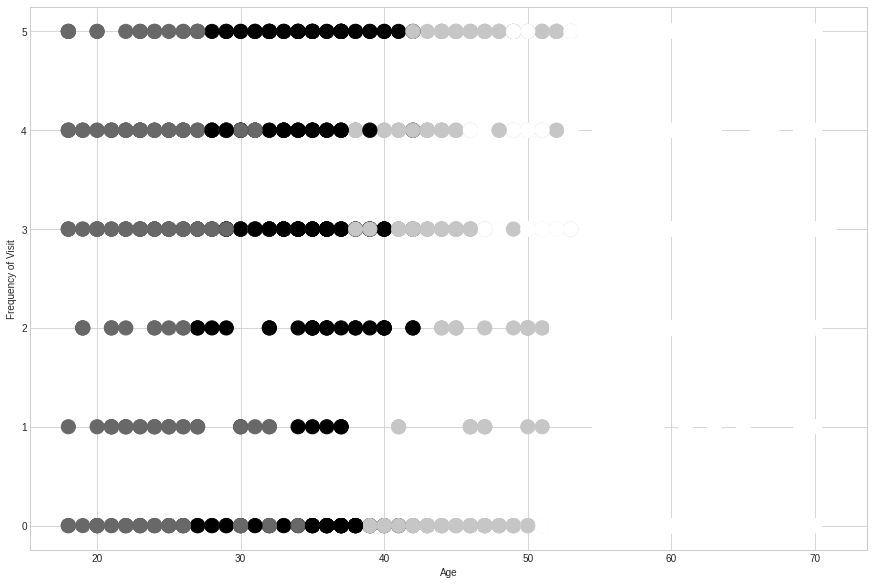

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(x ='Age', y ='VisitFrequency', data = data1 , c = data_predict1 , s = 200)
plt.xlabel("Age")
plt.ylabel("Frequency of Visit")
plt.show()